<a href="https://colab.research.google.com/github/easy-min/IT_business/blob/main/ITB_subject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 아비혁 실습과제 (10/31 전까지)


다음 2020년도 건강검진정보 샘플(1만건) 데이터를 이용하여 시각화 과정, 즉 탐색적 데이터 분석(Exploratory Data Analysis)을 수행하고 검진결과의 특징을 보여주시오. 

health_data.csv  (31개 항목, 1만건 데이터) 
health_data_description.xlsx  (데이터 설명) 

- matplotlib/seaborn/pandas 패키지를 이용하고, 필요하다면 엑셀 또는 파이썬 코드로 데이터 전처리 수행 
- 이용한 차트의 종류가 3가지 이상이어야 함 (산점도, 막대 그래프, 라인 그래프 등)
- 시각화 결과를 해석하고  3가지의 인사이트 도출하기 
- 코드는 github에 올리고 주소 제출

In [13]:
# 나눔폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

필요한 패키지 불러오기 및 google drive 연결

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

#나눔고딕 설치
plt.rc('font', family='NanumBarunGothic')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
h1 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv")
display(h1.head())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [3]:
h1.info

<bound method DataFrame.info of       기준년도  가입자일련번호  시도코드 성별코드  연령대코드(5세단위)  신장(5Cm단위)  체중(5Kg 단위)   허리둘레  \
0     2020        1    36    M            9        165          60   72.1   
1     2020        2    27    F           13        150          65   81.0   
2     2020        3    11    F           12        155          55   70.0   
3     2020        4    31    M           13        160          70   90.8   
4     2020        5    41    F           12        155          50   75.2   
...    ...      ...   ...  ...          ...        ...         ...    ...   
9995  2020     9996    44    F           13        155          55   83.0   
9996  2020     9997    43    F           11        160          55   77.5   
9997  2020     9998    45    M           12        160          80   93.0   
9998  2020     9999    27    F           15        155          55   78.0   
9999  2020    10000    45    F           13        160          75  100.0   

      시력(좌)  시력(우)  ...  혈청크레아티닌  (혈청지오티)AS

In [14]:
display(h1.isna().sum()) # 결측치 수

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
dtype: int64

(1) 연령대별로 허리둘레의 차이가 존재할까?

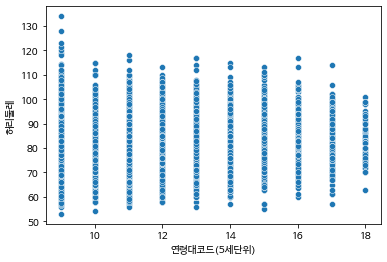

In [15]:
# 연령대별 허리 둘레 산점도
sns.scatterplot(data = h1, x = '연령대코드(5세단위)', y = '허리둘레')

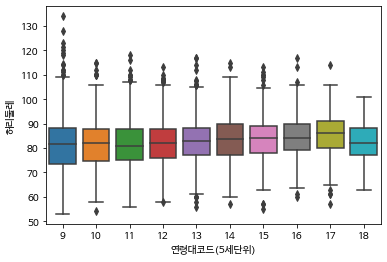

In [39]:
sns.boxplot(data = h1, x = '연령대코드(5세단위)', y = '허리둘레')

In [37]:
age_waist = h1.groupby('연령대코드(5세단위)', as_index = False).agg(meanwaist = ('허리둘레', 'mean'))
age_waist

,연령대코드(5세단위),meanwaist
0,9,81.559341
1,10,81.614098
2,11,81.576529
3,12,82.121762
4,13,82.816428
5,14,83.481503
6,15,83.607450
7,16,84.554642
8,17,85.005405
9,18,82.956364


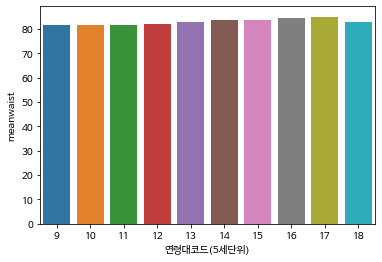

In [41]:
sns.barplot(data = age_waist, x = '연령대코드(5세단위)', y = 'meanwaist')

전체적으로 연령대가 높아질수록 허리둘레도 소폭 증가하는 모습을 보여준다. 이 때 가장 작은 허리둘레를 가진 연령대는 40~44세 구간이며, 가장 큰 허리둘레를 가진 연령대는 80세에서 84세이다. 또한 연령이 낮을수록 허리둘레는 넓은 범위에 퍼져있는 모습을 보여주며, 연령이 높아질수록 좁은 박스 범위안에 들어오는 모습을 보여준다.


(2) 수축혈압과 이완혈압은 성별과 연령에 따라 다른가?

먼저 수축기와 이완기에 na값이 총 88개 존재. 전체 10000 데이터 중 일부이기에 해당 행 제거

In [22]:
h1_1 = h1.dropna(subset = ['수축기혈압'], axis=0) 
h1_1 = h1_1.dropna(subset = ['이완기혈압'], axis=0) 
display(h1_1.isna().sum()) # 결측치 수

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압             0
이완기혈압             0
식전혈당(공복혈당)        0
총콜레스테롤         5868
트리글리세라이드       5868
HDL콜레스테롤       5868
LDL콜레스테롤       5935
혈색소               0
요단백              51
혈청크레아티닌           0
(혈청지오티)AST        0
(혈청지오티)ALT        0
감마지티피             0
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6661
치석             6661
데이터공개일자           0
dtype: int64

In [27]:
# 성별에 따라 수축기 혈압의 차이 존재?
sex_contract = h1_1.groupby('성별코드', as_index = False).agg(meancontract = ('수축기혈압', 'mean'))
sex_contract

,성별코드,meancontract
0,F,122.918053
1,M,126.319749


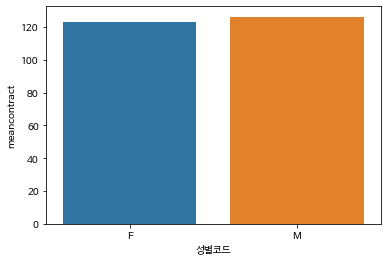

In [28]:
sns.barplot(data = sex_contract, x = '성별코드', y = 'meancontract')

In [29]:
# 성별에 따라 이완기 혈압의 차이 존재?
sex_relaxation = h1_1.groupby('성별코드', as_index = False).agg(meanrelaxation = ('이완기혈압', 'mean'))
sex_relaxation

,성별코드,meanrelaxation
0,F,74.937188
1,M,78.534875


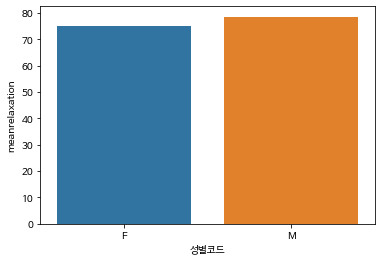

In [30]:
sns.barplot(data = sex_relaxation, x = '성별코드', y = 'meanrelaxation')

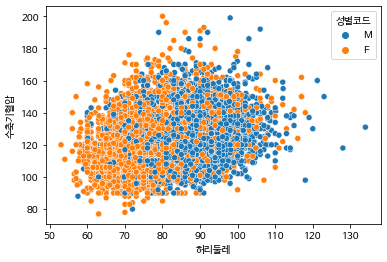

In [46]:
sns.scatterplot(data = h1_1, x = '허리둘레', y = '수축기혈압', hue = '성별코드')

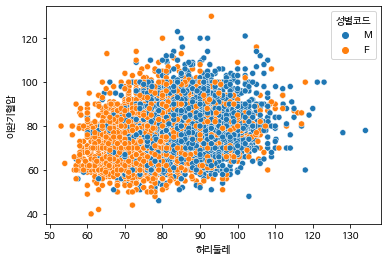

In [47]:
sns.scatterplot(data = h1_1, x = '허리둘레', y = '이완기혈압', hue = '성별코드')

In [33]:
# 연령에 따라 수축기 혈압의 차이 존재?
age_contraction = h1_1.groupby('연령대코드(5세단위)', as_index = False).agg(meancontraction = ('수축기혈압', 'mean'))
age_contraction

,연령대코드(5세단위),meancontraction
0,9,120.862314
1,10,121.842951
2,11,123.141268
3,12,124.214286
4,13,126.187093
5,14,128.543839
6,15,129.729970
7,16,131.456583
8,17,131.053719
9,18,129.040816


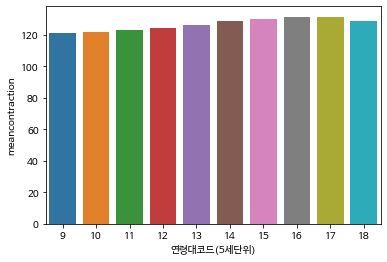

In [34]:
sns.barplot(data = age_contraction, x = '연령대코드(5세단위)', y = 'meancontraction')

In [31]:
# 연령에 따라 이완기 혈압의 차이 존재?
age_relaxation = h1_1.groupby('연령대코드(5세단위)', as_index = False).agg(meanrelaxation = ('이완기혈압', 'mean'))
age_relaxation

,연령대코드(5세단위),meanrelaxation
0,9,76.317388
1,10,77.081812
2,11,77.377642
3,12,77.389853
4,13,77.104302
5,14,76.644550
6,15,75.673591
7,16,75.207283
8,17,74.690083
9,18,73.530612


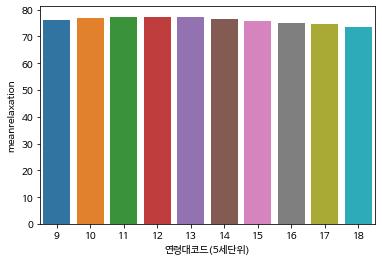

In [35]:
sns.barplot(data = age_relaxation, x = '연령대코드(5세단위)', y = 'meanrelaxation')

수축기와 이완기 분석 결과

성별로는 수축 혈압 차이가 약 3.3, 이완 혈압 차이가   4.4 정도 나는 모습을 볼 수 있다.
또한 성별에 있어서 수축 혈압과 이완 혈압 모두 큰 차이는 보이지 않지만, 허리둘레에서는 차이가 존재함을 알 수 있다.  """


연령대별로는 수축 혈압의 경우가 연령이 높아질 수록, 증가하는 형태를 보여주고, 이완 혈압의 경우 연령이 높아질 수록 낮아지는 형태를 보여준다.

(3) 연령대가 증가할 수록 공복혈당은 어떤 모습을 보여주는가?

In [50]:
age_blood = h1.groupby('연령대코드(5세단위)', as_index = False).agg(meanblood = ('식전혈당(공복혈당)', 'mean'))
age_blood

,연령대코드(5세단위),meanblood
0,9,98.521655
1,10,102.371074
2,11,102.956618
3,12,104.818425
4,13,105.002608
5,14,105.492891
6,15,108.746291
7,16,108.532213
8,17,110.123967
9,18,105.081633


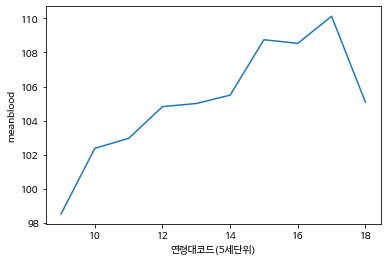

In [51]:
sns.lineplot(data = age_blood, x = '연령대코드(5세단위)', y = 'meanblood')

In [54]:
age_count = h1['연령대코드(5세단위)'].value_counts()
print(age_count)

11    1798
9     1547
13    1534
12    1498
10    1369
14     865
15     698
16     377
17     259
18      55
Name: 연령대코드(5세단위), dtype: int64


연령대가 증가할 수록 공복혈당은 점차 증가하며 연령대코드 18이 되면 수치가 갑자기 떨어진다.
이는 연령대코드18이 연령 85세 이상의 집단을 의미하고, 이 집단은 만 명 중 55명 (0.0055%)에 이를 정도로 그 숫자가 매우 작아 신뢰성이 높다고 할 수 없다. 

# (시각화 및 결론)


(1) (85세 이후 연령 그룹을 제외한) 연령대가 높아질 수록 허리둘레도 커지며, 허리둘레 분포 모양도 연령대가 낮을 때는 그 분포가 넓은 모습에서 좁은 모습으로 바뀐다.

(2) 성별로는 수축혈압과 이완 혈압 모두 남자가 조금 더 높은 모습을 볼 수 있다. 이 때 성별 기준에서 수축혈압과 이완 혈압보다 허리둘레에서의 분포 차이가 더 크다. 또한 수축혈압에 있어서 연령이 증가함에 따라(85세 이후 연령 그룹을 제외하고) 점차 증가하고 이완혈압에 있어서는 연령대코드 12까지는 점차 증가하다가 이후 감소하는 모습을 보여준다.

(3)  (85세 이후 연령 그룹을 제외한) 연령이 증가할수록 공복혈당은 점차 증가한다.

이 때 (85세 이후 연령 그룹)의 경우, 그 데이터 숫자가 작아 높은 신뢰도를 얻지 못했기 때문에, 이와 관련해서는 추가적인 데이터 분석이 필요함을 알 수 있다.